In [1]:
import json, os, sys

from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    
import utils
import result_helper


sns.set(style="whitegrid")

In [2]:
skadi_job_paths = list(Path("../data/experiments-skadi/rwe/").glob("noisy_10*/**/job-info.json"))
odin_job_paths = list(Path("../data/experiments-odin/rwe").glob("noisy_10*/**/job-info.json"))

job_paths = skadi_job_paths + odin_job_paths

df_data = result_helper.get_result_summary(job_paths)

cols_irrelavant = [
    "started_at", "completed_at", "precision_score", "recall_score", "f1_score", "random_seed",
    'experiment_type', 'experiment_name', 'component_size', 'variance', 'label_noise_proba',
    'allow_self_loops', 'distance_metric', 'job_path', 'duration_secs'
]
cols_relevant = list(set(df_data.columns) - set(cols_irrelavant))

## Introduction

### Purpose of the experiments

- Determine how to parameterize the data generator and the algorithm when the labels are noisy



### Default parameters in all experiments

- Number of Gaussian components $k$ is the same as the number of dimensions $d$
- Number of points in each Gaussian component: 50
- Variance in each component: 1
- Label noise: 0.1
- No self-loops


## Impact of fixed separation on noisy labels

Experiment parameters:
- $\beta = 1$
- Number of random walk steps: 10

In [3]:
f_noisy_10_fixed_dist_01 = df_data.experiment_name == "noisy_10_fixed_dist_01"
df_ff = df_data[(f_noisy_10_fixed_dist_01)].copy()
df_ff.pivot(index=["min_distance"], columns=["n_dim"], values=["accuracy_score"])

accuracy_score                                        
n_dim                   10        50        100       150       200
min_distance                                                       
1.0                0.217314  0.066410  0.050033  0.038164  0.039136
3.0                0.502530  0.097538  0.060872  0.047264  0.042574
5.0                0.992000  0.432000  0.127991  0.064687  0.045393
7.0                1.000000  0.938400  0.655486  0.185537  0.065582
10.0               1.000000  0.998400  0.979600  0.971333  0.646101

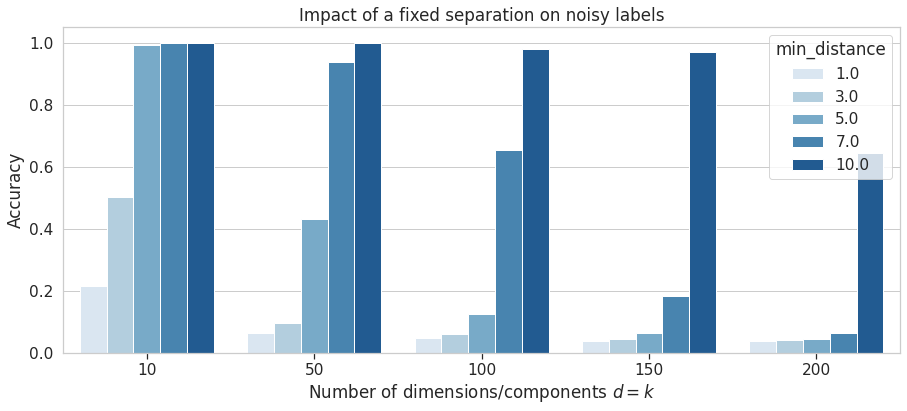

In [4]:
df_data_filtered = df_data[f_noisy_10_fixed_dist_01].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score",hue="min_distance",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact of a fixed separation on noisy labels");
    # ax.set_ylim([0, 1])

## Impact of separation $k^{\frac{1}{4}}$

Experiment parameters:
- Separation: $k^{1/4}\cdot c$ where $c \in \{ 3, 4, 5, 6 \}$
- $\beta = 1$
- Number of random walk steps: 10

In [5]:
f_noisy_10_fixed_dist_02 = df_data.experiment_name == "noisy_10_fixed_dist_02"
df_ff = df_data[(f_noisy_10_fixed_dist_02)].copy()
df_ff["c"] = df_ff.groupby("n_dim")[["min_distance"]].rank("dense").astype(int) + 2
df_ff.pivot(index=["c"], columns=["n_dim"], values=["accuracy_score"])

accuracy_score                                    
n_dim            10      50      100       150       200
c                                                       
3                1.0  0.9740  0.9892  0.972267  0.941600
4                1.0  0.9996  0.9786  0.986667  0.990000
5                1.0  1.0000  1.0000  0.993333  0.995000
6                1.0  1.0000  1.0000  1.000000  0.990099

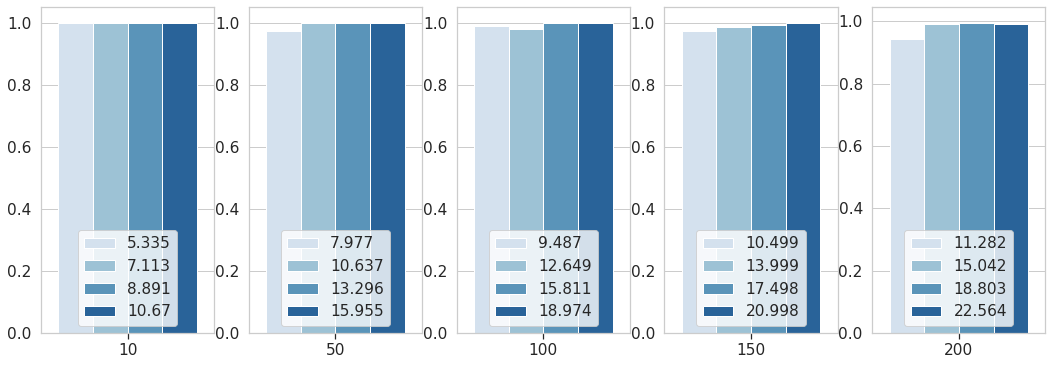

In [6]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=5, figsize=(18, 6))
    for i, n_dim in enumerate([10, 50, 100, 150, 200]):
        
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[(f_noisy_10_fixed_dist_02) & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["min_distance"] = df_data_filtered["min_distance"].round(3)
        
        if df_data_filtered.shape[0] == 0:
            print(f"No data for d={n_dim}")
            continue
        
        sns.barplot(
            x="n_dim",y="accuracy_score", hue="min_distance",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        #ax.legend(title='Bias factor: $\\beta$', loc='upper left', labels=['1/4', '1/8', '1/16', '1/32'])
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_xlabel("")
        axes[i].legend(loc='lower center')
        axes[i].set_title(f"");

        # ax.set_ylim([0, 1])

## Impact of separation $k^{\frac{1}{3}}$

Experiment parameters:
- Separation: $k^{1/3}\cdot c$ where $c \in \{ 3, 4 \}$
- $\beta = 1$
- Number of random walk steps: 10

In [7]:
f_noisy_10_fixed_dist_03 = df_data.experiment_name == "noisy_10_fixed_dist_03"
df_ff = df_data[(f_noisy_10_fixed_dist_03)].copy()
df_ff["c"] = df_ff.groupby("n_dim")[["min_distance"]].rank("dense").astype(int) + 2
df_ff.pivot(index=["c"], columns=["n_dim"], values=["accuracy_score"])

accuracy_score                          
n_dim            10      50      100       150
c                                             
3                1.0  0.9996  0.9896  0.986667
4                1.0  1.0000  1.0000  1.000000

No data for d=200


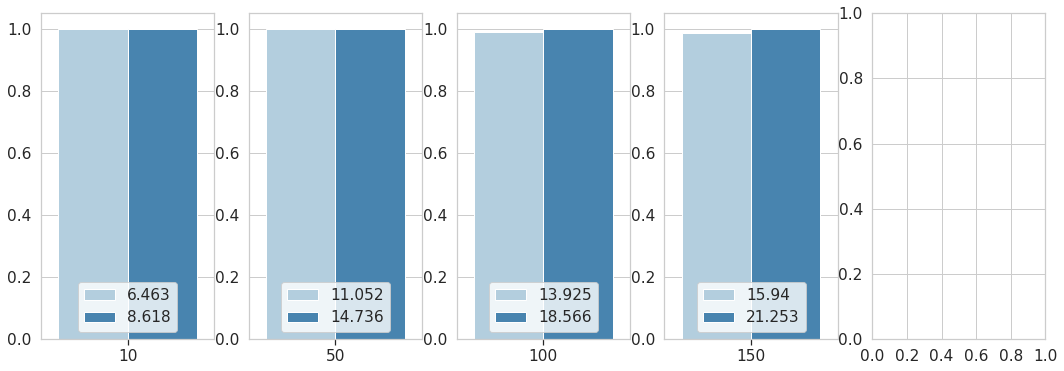

In [8]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=5, figsize=(18, 6))
    for i, n_dim in enumerate([10, 50, 100, 150, 200]):
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[(f_noisy_10_fixed_dist_03) & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["min_distance"] = df_data_filtered["min_distance"].round(3)
        
        if df_data_filtered.shape[0] == 0:
            print(f"No data for d={n_dim}")
            continue
        
        sns.barplot(
            x="n_dim",y="accuracy_score", hue="min_distance",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        #ax.legend(title='Bias factor: $\\beta$', loc='upper left', labels=['1/4', '1/8', '1/16', '1/32'])
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_xlabel("")
        axes[i].legend(loc='lower center')
        axes[i].set_title(f"");

        #axes[i].set_ylim([0.98, 1.01])

## Impact of separation $k^{\frac{1}{2}}$

Experiment parameters:
- Separation: $k^{1/2}\cdot c$ where $c \in \{ 2, 3 \}$
- $\beta = 1$
- Number of random walk steps: 10

In [9]:
f_noisy_10_fixed_dist_04 = df_data.experiment_name == "noisy_10_fixed_dist_04"
df_ff = df_data[(f_noisy_10_fixed_dist_04)].copy()
df_ff["c"] = df_ff.groupby("n_dim")[["min_distance"]].rank("dense").astype(int) + 1
df_ff.pivot(index=["c"], columns=["n_dim"], values=["accuracy_score"])

accuracy_score          
n_dim            10   50   100
c                             
2                1.0  1.0  1.0
3                1.0  1.0  1.0

No data for d=200


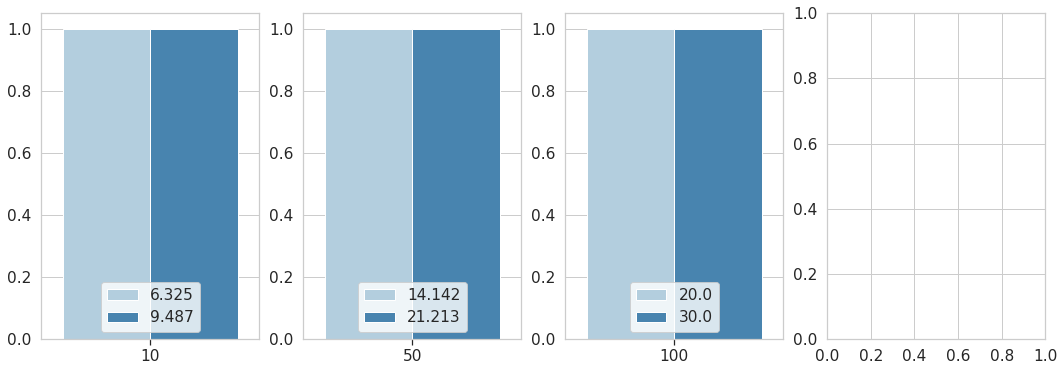

In [10]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=4, figsize=(18, 6))
    for i, n_dim in enumerate([10, 50, 100, 200]):
        
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[(f_noisy_10_fixed_dist_04) & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["min_distance"] = df_data_filtered["min_distance"].round(3)
        
        if df_data_filtered.shape[0] == 0:
            print(f"No data for d={n_dim}")
            continue
        
        sns.barplot(
            x="n_dim",y="accuracy_score", hue="min_distance",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        #ax.legend(title='Bias factor: $\\beta$', loc='upper left', labels=['1/4', '1/8', '1/16', '1/32'])
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_xlabel("")
        axes[i].legend(loc='lower center')
        axes[i].set_title(f"");

        #axes[i].set_ylim([0.98, 1.01])

Experiment parameters:
- Separation: $k^{1/2}\cdot c$ where $c \in \{ 2, 3 \}$
- $\beta = 1$
- Number of random walk steps: 5

In [11]:
f_noisy_10_fixed_dist_05 = df_data.experiment_name == "noisy_10_fixed_dist_05"
df_ff = df_data[(f_noisy_10_fixed_dist_05)].copy()
df_ff["c"] = df_ff.groupby("n_dim")[["min_distance"]].rank("dense").astype(int) + 1
df_ff.pivot(index=["c"], columns=["n_dim"], values=["accuracy_score"])

accuracy_score          
n_dim            10   50   100
c                             
2                1.0  1.0  1.0
3                1.0  1.0  1.0

No data for d=200


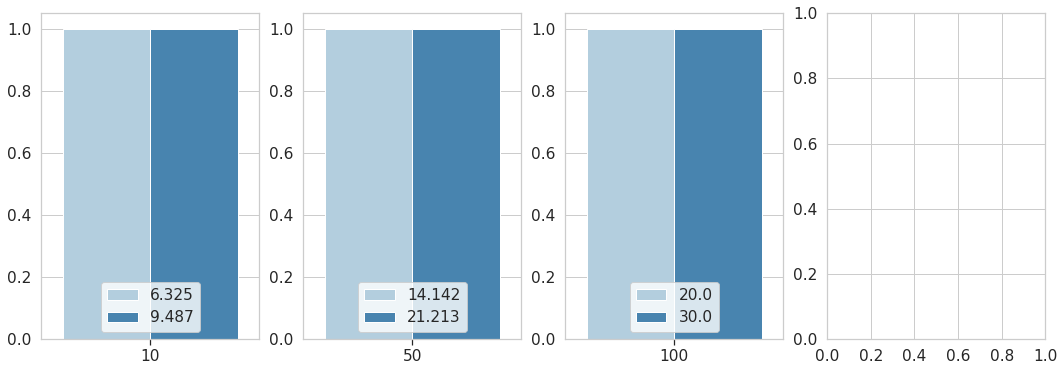

In [12]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=4, figsize=(18, 6))
    for i, n_dim in enumerate([10, 50, 100, 200]):
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[(f_noisy_10_fixed_dist_05) & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["min_distance"] = df_data_filtered["min_distance"].round(3)
        
        if df_data_filtered.shape[0] == 0:
            print(f"No data for d={n_dim}")
            continue
        
        sns.barplot(
            x="n_dim",y="accuracy_score", hue="min_distance",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        #ax.legend(title='Bias factor: $\\beta$', loc='upper left', labels=['1/4', '1/8', '1/16', '1/32'])
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_xlabel("")
        axes[i].legend(loc='lower center')
        axes[i].set_title(f"");

        #axes[i].set_ylim([0.98, 1.01])